Statistics about Raw STARR-OMOP Dataset

In [1]:
import os
import json
import collections
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

SPLITS = ['all', 'train', 'val', 'test']

PATH_TO_CACHE_DIR = '/share/pi/nigam/mwornow/hf_ehr/cache/'
path_to_v8_stats_dir: str = os.path.join(PATH_TO_CACHE_DIR, 'dataset_stats', 'v8')
path_to_v9_stats_dir: str = os.path.join(PATH_TO_CACHE_DIR, 'dataset_stats', 'v9')

In [2]:
# Choose extract -- use FEMRv8
path_to_stats_dir = path_to_v8_stats_dir

## Load Data

In [3]:
# Load data
code_2_count = json.load(open(os.path.join(path_to_stats_dir, 'code_2_count.json'), 'r'))
code_2_unique_patient_count = json.load(open(os.path.join(path_to_stats_dir, 'code_2_unique_patient_count.json'), 'r'))
patient_2_sequence_length = json.load(open(os.path.join(path_to_stats_dir, 'patient_2_sequence_length.json'), 'r'))
patient_2_unique_sequence_length = json.load(open(os.path.join(path_to_stats_dir, 'patient_2_unique_sequence_length.json'), 'r'))

## Stats

In [4]:
# High-level stats
def print_special(text: str, fd):
    print(text)
    fd.write(text + '\n')

for split in SPLITS:
    n_events: int = sum(code_2_count[split].values())
    n_patients: int = len(patient_2_sequence_length[split])
    with open(os.path.join(path_to_stats_dir, f'{split}_stats.txt'), 'w') as fd:
        print_special(f"==== {split} ====", fd)
        print_special(f"  # of events: {n_events}", fd)
        print_special(f"  # of unique codes: {len(code_2_count[split])}", fd)
        print_special(f"  # of unique patients: {n_patients}", fd)
        print_special("", fd)
        print_special(f"  min events/patient: {min(patient_2_sequence_length[split].values())}", fd)
        print_special(f"  mean events/patient: {round(statistics.mean(patient_2_sequence_length[split].values()), 2)}", fd)
        print_special(f"  median events/patient: {statistics.median(patient_2_sequence_length[split].values())}", fd)
        print_special(f"  max events/patient: {max(patient_2_sequence_length[split].values())}", fd)
        print_special("", fd)
        print_special(f"  min unique events/patient: {min(patient_2_unique_sequence_length[split].values())}", fd)
        print_special(f"  mean unique events/patient: {round(statistics.mean(patient_2_unique_sequence_length[split].values()), 2)}", fd)
        print_special(f"  median unique events/patient: {statistics.median(patient_2_unique_sequence_length[split].values())}", fd)
        print_special(f"  max unique events/patient: {max(patient_2_unique_sequence_length[split].values())}", fd)
        print_special("", fd)

==== all ====
  # of events: 5001616678
  # of unique codes: 4292751
  # of unique patients: 3668615

  min events/patient: 1
  mean events/patient: 1363.35
  median events/patient: 121
  max events/patient: 890048

  min unique events/patient: 1
  mean unique events/patient: 237.4
  median unique events/patient: 76
  max unique events/patient: 26131

==== train ====
  # of events: 3501210238
  # of unique codes: 3144978
  # of unique patients: 2567450

  min events/patient: 1
  mean events/patient: 1363.69
  median events/patient: 121.0
  max events/patient: 890048

  min unique events/patient: 1
  mean unique events/patient: 237.36
  median unique events/patient: 76.0
  max unique events/patient: 26131

==== val ====
  # of events: 749003035
  # of unique codes: 881012
  # of unique patients: 550305

  min events/patient: 1
  mean events/patient: 1361.07
  median events/patient: 121
  max events/patient: 638708

  min unique events/patient: 1
  mean unique events/patient: 237.69
  me

# Tables

In [9]:
# Count of codes per vocab
vocab_2_count = collections.defaultdict(int) # [key] = vocab, [value] = count of all code occurrences from that vocab
vocab_2_unique_count = collections.defaultdict(int) # [key] = vocab, [value] = count of all unique codes in that vocab
for code, count in code_2_count['all'].items():
    vocab: str = code.split("/")[0]
    vocab_2_count[vocab] += count
    vocab_2_unique_count[vocab] += 1
df = pd.DataFrame(vocab_2_count.items(), columns=['vocab', 'occurrence_count']).sort_values(by='occurrence_count', ascending=False)
df['token_count'] = df['vocab'].apply(lambda x: vocab_2_unique_count[x])
df['occurrence_percent'] = df['occurrence_count'] / df['occurrence_count'].sum()
df['token_percent'] = df['token_count'] / df['token_count'].sum()
df.to_csv(os.path.join(path_to_stats_dir, 'vocab_2_count.csv'), index=False)
df

vocab  occurrence_count  token_count  occurrence_percent  \
5           STANFORD_OBS        2411335121      4216200            0.482111   
3                  LOINC        1853378711         9832            0.370556   
0                 SNOMED         407955705        22367            0.081565   
9                 RxNorm         106848992        11271            0.021363   
4                   CPT4          87586400         8519            0.017512   
8                  Visit          43170097            6            0.008631   
6                 Domain          36390009            1            0.007276   
7     Medicare Specialty          20457508            1            0.004090   
10             CARE_SITE          12583425          472            0.002516   
12  CMS Place of Service           5099408            2            0.001020   
15      RxNorm Extension           4488041          881            0.000897   
1                 Gender           3664788            2            0.000733   
2              Ethnicity           2541960            2            0.000508   
13                  Race           2100924            5            0.000420   
11                   CVX           1733632           64            0.000347   
16              ICD10PCS           1138767        20124            0.000228   
19       Cancer Modifier            417104          224            0.000083   
17              ICD9Proc            388638         1471            0.000078   
18                 HCPCS            128236          217            0.000026   
14        OMOP Extension            114031            3            0.000023   
21                 ICDO3             57989         1086            0.000012   
20        Condition Type             37192            1            0.000007   

    token_percent  
5    9.821674e-01  
3    2.290373e-03  
0    5.210412e-03  
9    2.625589e-03  
4    1.984508e-03  
8    1.397705e-06  
6    2.329509e-07  
7    2.329509e-07  
10   1.099528e-04  
12   4.659017e-07  
15   2.052297e-04  
1    4.659017e-07  
2    4.659017e-07  
13   1.164754e-06  
11   1.490885e-05  
16   4.687903e-03  
19   5.218099e-05  
17   3.426707e-04  
18   5.055033e-05  
14   6.988526e-07  
21   2.529846e-04  
20   2.329509e-07

In [11]:
# Exclude STANFORD_OBS
df_no_stanford = df[df['vocab'] != 'STANFORD_OBS'].copy()
df_no_stanford['occurrence_percent'] = df_no_stanford['occurrence_count'] / df_no_stanford['occurrence_count'].sum()
df_no_stanford['token_percent'] = df_no_stanford['token_count'] / df_no_stanford['token_count'].sum()
df_no_stanford.to_csv(os.path.join(path_to_stats_dir, 'vocab_2_count_no_stanford.csv'), index=False)
df_no_stanford

vocab  occurrence_count  token_count  occurrence_percent  \
3                  LOINC        1853378711         9832            0.715512   
0                 SNOMED         407955705        22367            0.157495   
9                 RxNorm         106848992        11271            0.041250   
4                   CPT4          87586400         8519            0.033813   
8                  Visit          43170097            6            0.016666   
6                 Domain          36390009            1            0.014049   
7     Medicare Specialty          20457508            1            0.007898   
10             CARE_SITE          12583425          472            0.004858   
12  CMS Place of Service           5099408            2            0.001969   
15      RxNorm Extension           4488041          881            0.001733   
1                 Gender           3664788            2            0.001415   
2              Ethnicity           2541960            2            0.000981   
13                  Race           2100924            5            0.000811   
11                   CVX           1733632           64            0.000669   
16              ICD10PCS           1138767        20124            0.000440   
19       Cancer Modifier            417104          224            0.000161   
17              ICD9Proc            388638         1471            0.000150   
18                 HCPCS            128236          217            0.000050   
14        OMOP Extension            114031            3            0.000044   
21                 ICDO3             57989         1086            0.000022   
20        Condition Type             37192            1            0.000014   

    token_percent  
3        0.128437  
0        0.292184  
9        0.147235  
4        0.111285  
8        0.000078  
6        0.000013  
7        0.000013  
10       0.006166  
12       0.000026  
15       0.011509  
1        0.000026  
2        0.000026  
13       0.000065  
11       0.000836  
16       0.262884  
19       0.002926  
17       0.019216  
18       0.002835  
14       0.000039  
21       0.014187  
20       0.000013

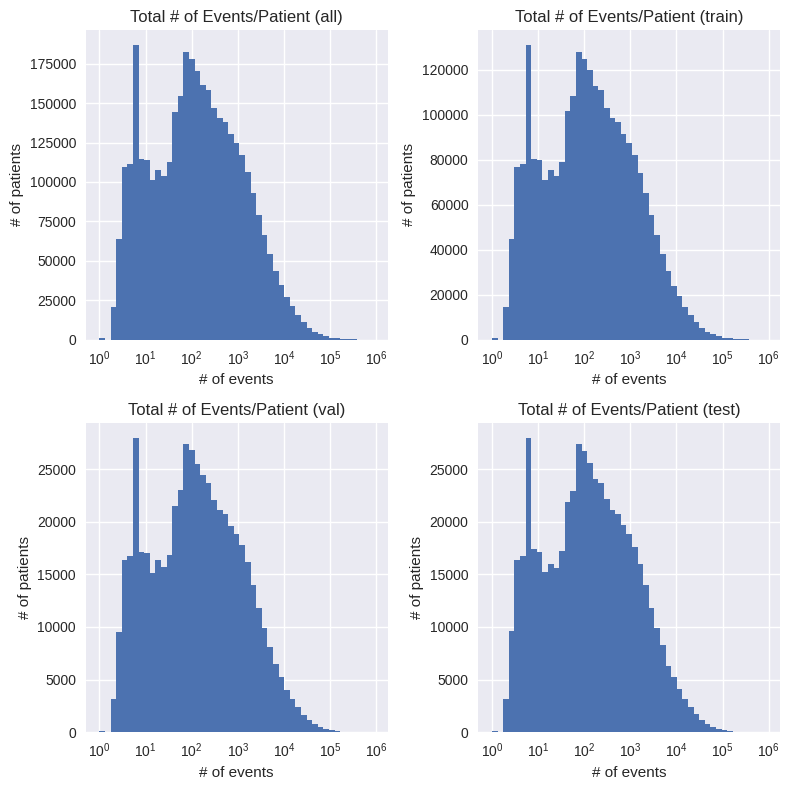

In [13]:
# Distribution of events/patient for each split, one in each subplot of a 2x2 grid. Use a for loop over SPLITS
plot_histogram(patient_2_sequence_length, os.path.join(path_to_v8_stats_dir, 'patient_2_sequence_length.png'), 
                'Total # of Events/Patient', '# of events', '# of patients')

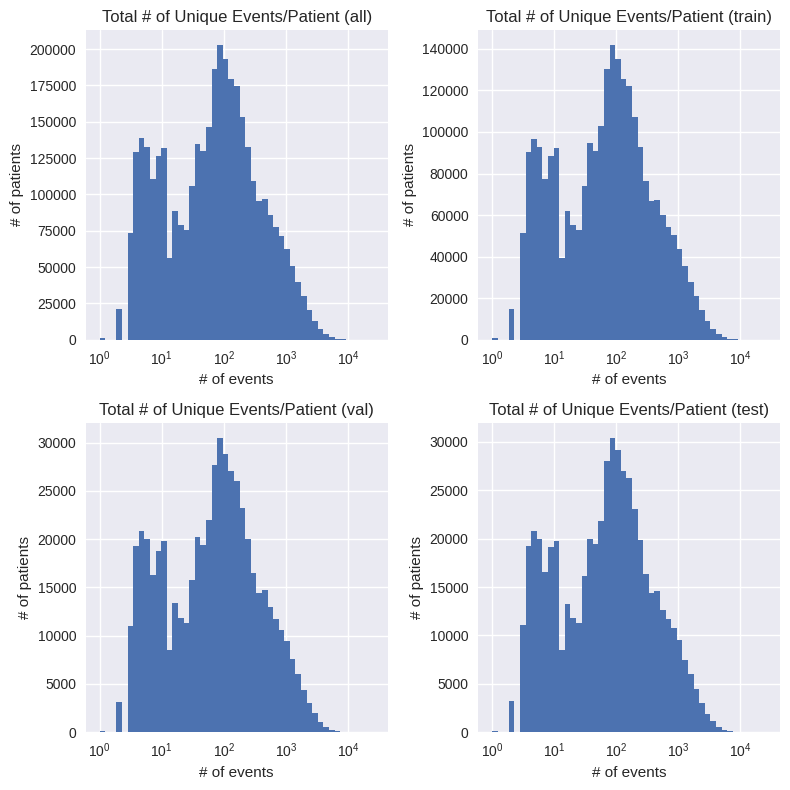

In [7]:
# Distribution of UNIQUE events/patient for each split, one in each subplot of a 2x2 grid. Use a for loop over SPLITS
plot_histogram(patient_2_unique_sequence_length, os.path.join(path_to_v8_stats_dir, 'patient_2_unique_sequence_length.png'), 
                'Total # of Unique Events/Patient', '# of events', '# of patients')

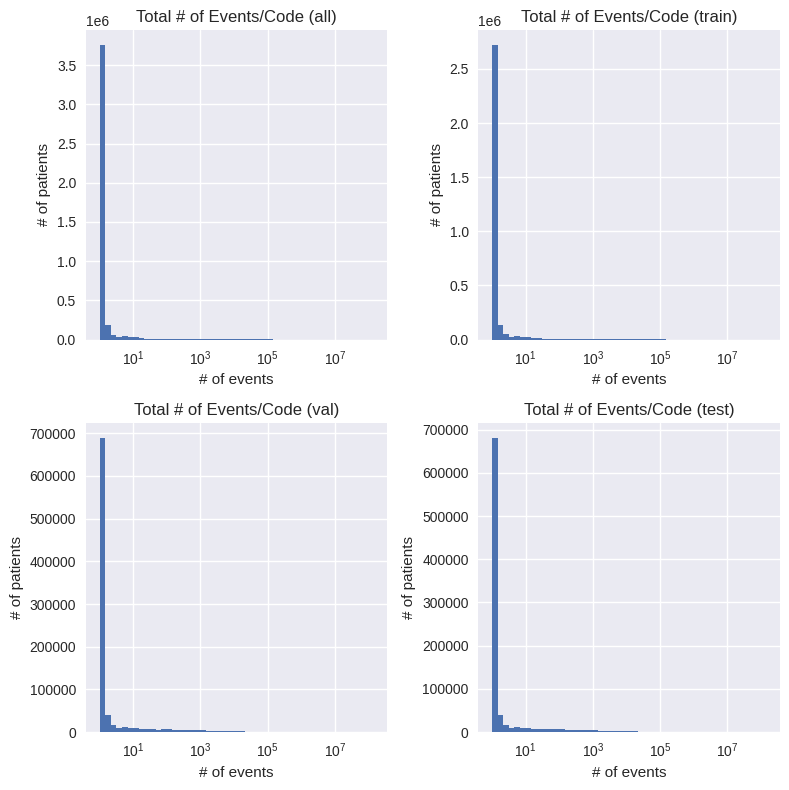

In [16]:
# Distribution of code occurrences for each split, one in each subplot of a 2x2 grid. Use a for loop over SPLITS
plot_histogram(code_2_count, os.path.join(path_to_v8_stats_dir, 'code_2_count.png'), 
                'Total # of Events/Code', '# of events', '# of codes')

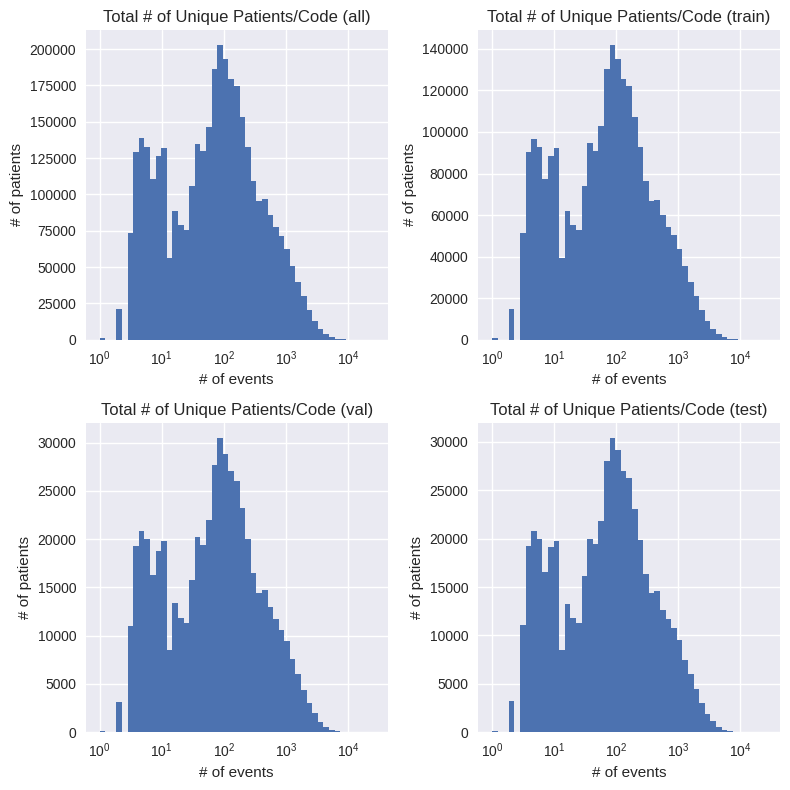

In [15]:
# Distribution of code occurrences for each split, one in each subplot of a 2x2 grid. Use a for loop over SPLITS
plot_histogram(patient_2_unique_sequence_length, os.path.join(path_to_v8_stats_dir, 'patient_2_unique_sequence_length.png'), 
                'Total # of Unique Patients/Code', '# of patients', '# of codes')